In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from utils import config, utils

In [2]:
df, df_cv = utils.Utils.load_data()

Test 1:
- lemmatizing: No
- Additional removal of words: No
- Remove URLs: No

In [3]:
nltk_rf_model_1 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=False, remove_urls=False)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_1"
)

In [ ]:
nltk_rf_model_1.fit(False)
nltk_rf_model_1.evaluate(False)

In [ ]:
nltk_rf_model_1.fit(True)
nltk_rf_model_1.evaluate(True)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   1.5s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  15.9s
Classification Report for nltk_rf_1 - balanced train data:


In [ ]:
nltk_rf_model_1.dump(config.MODEL_DIR)

Test 2:
- Lemmatizing: No
- Additional reomval of words: Yes
- Remove Urls: No

In [6]:
nltk_rf_model_2 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=False, remove_urls=False)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_2"
)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   2.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  16.7s
Classification Report for nltk_rf_2 - unbalanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.77      0.64      0.70       744
     neutral       0.77      0.90      0.83      1304
    positive       0.86      0.81      0.84      1661

    accuracy                           0.81      3709
   macro avg       0.80      0.79      0.79      3709
weighted avg       0.81      0.81      0.81      3709

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.45      0.10      0.17      8987
     neutral       0.38      0.29      0.33      8987
    positive       0.35      0.71      0.47      8987

    accuracy                           0.37     26961
   macro avg       0.39      0.37      0.32     26961
weigh

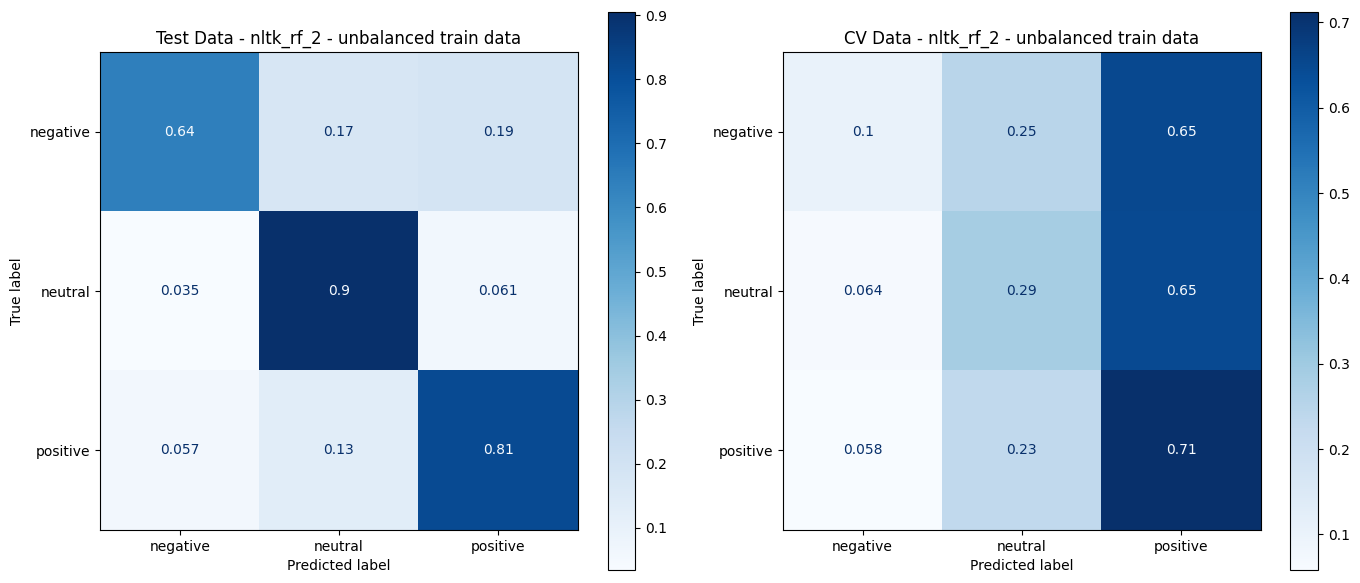

In [7]:
nltk_rf_model_2.fit(False)
nltk_rf_model_2.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   1.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  10.1s
Classification Report for nltk_rf_2 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.81      0.96      0.88       744
     neutral       0.85      0.93      0.89      1304
    positive       0.97      0.82      0.89      1661

    accuracy                           0.89      3709
   macro avg       0.88      0.90      0.89      3709
weighted avg       0.90      0.89      0.89      3709

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.42      0.21      0.28      8987
     neutral       0.35      0.36      0.36      8987
    positive       0.36      0.53      0.43      8987

    accuracy                           0.37     26961
   macro avg       0.38      0.37      0.36     26961
weighte

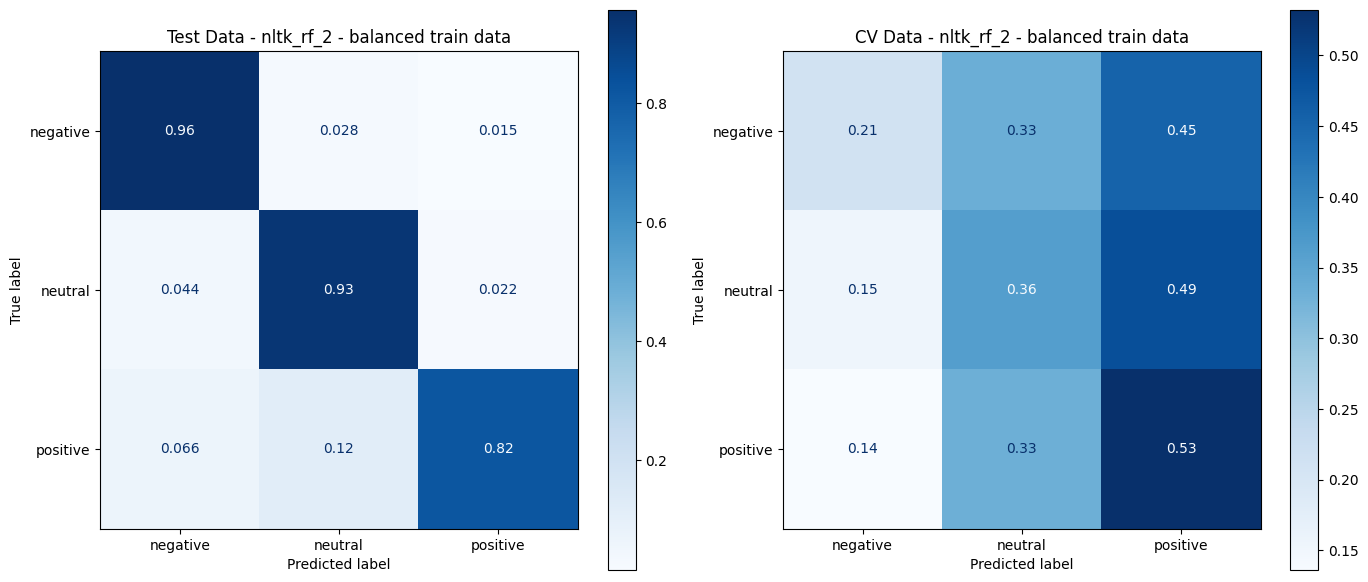

In [8]:
nltk_rf_model_2.fit(True)
nltk_rf_model_2.evaluate(True)

Test 3
- Lemmatizing: Yes
- Additional removal of words: Yes
- Remove URLs: Yes

In [9]:
nltk_rf_model_3 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=True, remove_urls=True)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_3"
)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  17.8s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  16.6s
Classification Report for nltk_rf_3 - unbalanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.75      0.58      0.66       744
     neutral       0.74      0.86      0.79      1304
    positive       0.82      0.80      0.81      1661

    accuracy                           0.78      3709
   macro avg       0.77      0.75      0.75      3709
weighted avg       0.78      0.78      0.77      3709

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.50      0.08      0.14      8987
     neutral       0.36      0.27      0.31      8987
    positive       0.35      0.72      0.47      8987

    accuracy                           0.36     26961
   macro avg       0.40      0.36      0.31     26961
weigh

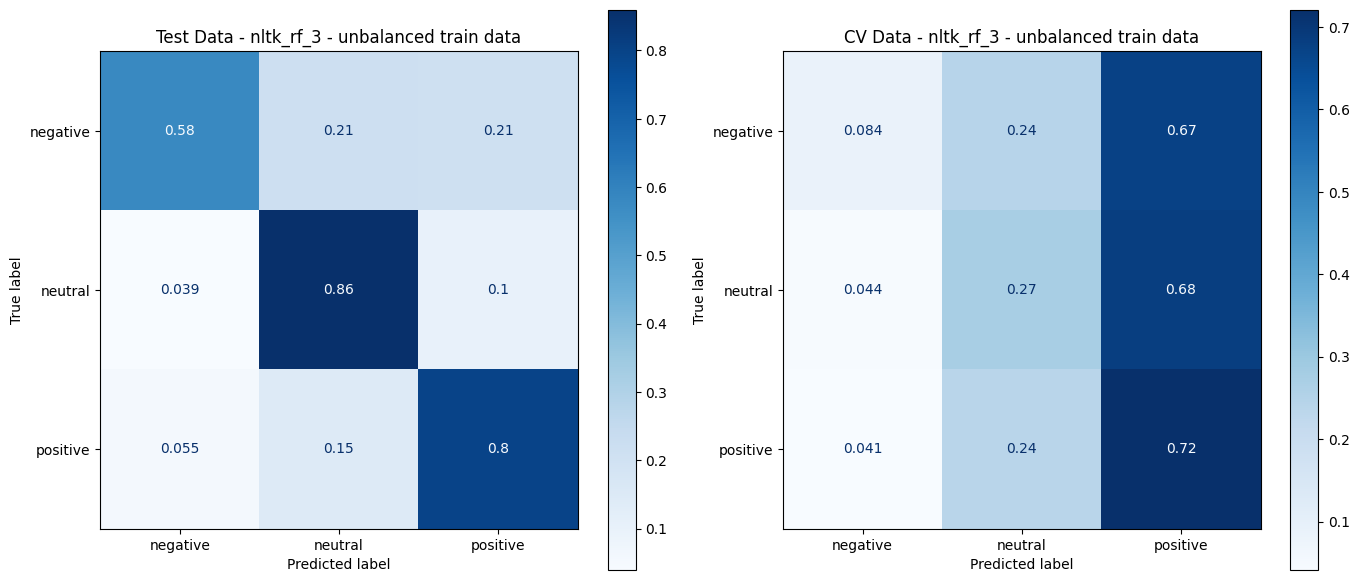

In [10]:
nltk_rf_model_3.fit(False)
nltk_rf_model_3.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   7.7s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   7.0s
Classification Report for nltk_rf_3 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.80      0.95      0.87       744
     neutral       0.83      0.92      0.87      1304
    positive       0.95      0.80      0.87      1661

    accuracy                           0.87      3709
   macro avg       0.86      0.89      0.87      3709
weighted avg       0.88      0.87      0.87      3709

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.45      0.23      0.30      8987
     neutral       0.36      0.36      0.36      8987
    positive       0.36      0.54      0.43      8987

    accuracy                           0.38     26961
   macro avg       0.39      0.38      0.36     26961
weighte

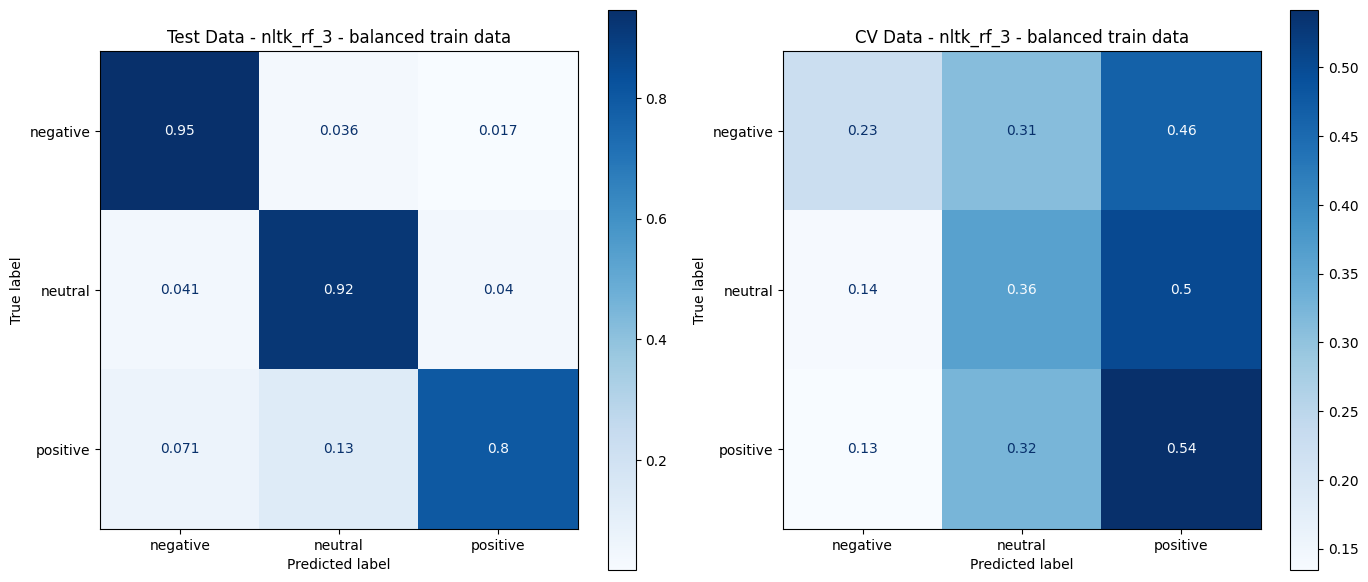

In [11]:
nltk_rf_model_3.fit(True)
nltk_rf_model_3.evaluate(True)

In [ ]:
nltk_rf_model_3.dump(config.MODEL_DIR)